In [49]:
import pandas as pd

# Leer el archivo Excel correctamente
df = pd.read_excel(r"C:\Users\El economista\Documents\GitHub\-BigDataUBA-Grupo-25\TPs\TP4\df_completo_original.xlsx")

In [50]:
import pandas as pd
# Crear la nueva columna "edad²" con los valores al cuadrado
# Renombrar la columna "edad" a "edad2"
df.rename(columns={"ch06": "edad2"}, inplace=True)
df["edad²"] = df["edad2"] ** 2
df["pp3e_tot"] = df["pp3e_tot"].fillna(0)
df["pp3f_tot"] = df["pp3f_tot"].fillna(0)
df["horastrab"] = df["pp3e_tot"] + df["pp3f_tot"]
# Aplicar el coeficiente de ajuste
df["p21"] = df["p21"].astype(float)  # Convertir a float antes de modificar
df.loc[df["ano4"] == 2004, "p21"] *= 314.621568
# Calcular el salario semanal
df["salario_semanal"] = df["p21"] / 40
# Función para calcular años de educación
def calcular_educ(row):
    if row["ch12"] == 2:  # Primario
        return row["ch14"]
    elif row["ch12"] == 4:  # Secundario
        return 12 if row["ch13"] == 1 else row["ch14"]
    elif row["ch12"] == 6:  # Terciario
        return 15 if row["ch13"] == 1 else 12 + row["ch14"]
    elif row["ch12"] == 7:  # Universitario
        return 17 if row["ch13"] == 1 else 12 + row["ch14"]
    elif row["ch12"] == 9:  # Educación especial
        return None  # No comparable
    else:
        return None  # Ns/Nr u otro valor

# Aplicar la función al DataFrame
df["educ"] = df.apply(calcular_educ, axis=1)
# Crear variable mujer
df["mujer"] = (df["ch04"] == 2).astype(int) 

In [51]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Crear la variable dependiente (y) a partir de PP04A
df["desocupado"] = (df["pp04a"] == 2).astype(int)  # 1 = Desocupado, 0 = Ocupado

# Variables predictoras (X) y dependiente (y)
X = df[["edad2", "edad²", "educ", "salario_semanal", "horastrab"]].copy()
y = df["desocupado"]

# Agregar la columna de unos para la regresión
X["constante"] = np.ones(len(df))

# Dividir en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

In [52]:
import statsmodels.api as sm
import pandas as pd
from sklearn.impute import SimpleImputer

# Asegurar que 'salario_semanal' no tenga NaN
df = df.dropna(subset=["salario_semanal"])

# Crear variable mujer
df["mujer"] = (df["ch04"] == 2).astype(int)  

# Variables predictoras para cada modelo
variables_modelos = [
    ["edad2"],  # Modelo 1
    ["edad2", "edad²"],  # Modelo 2
    ["edad2", "edad²", "educ"],  # Modelo 3
    ["edad2", "edad²", "educ", "mujer"],  # Modelo 4
    ["edad2", "edad²", "educ", "mujer", "horastrab", "desocupado"]  # Modelo 5
]

# Limpiar NaN en variables predictoras
imputer = SimpleImputer(strategy="median")
df[["edad2", "edad²", "educ", "horastrab", "desocupado"]] = imputer.fit_transform(df[["edad2", "edad²", "educ", "horastrab", "desocupado"]])

# Almacenar los modelos estimados
modelos = {}

for i, variables in enumerate(variables_modelos):
    X = df[variables].copy()
    X["constante"] = 1  # Agregar constante
    y = df["salario_semanal"]

    # Asegurar que los índices estén alineados
    y = y.loc[X.index]

    # Ajustar el modelo
    modelos[f"Modelo {i+1}"] = sm.OLS(y, X).fit()

# Crear tabla con coeficientes
tabla_resultados = pd.DataFrame({
    "Variables": ["edad2", "edad²", "educ", "mujer", "horastrab", "desocupado"]
})

for nombre, modelo in modelos.items():
    tabla_resultados[nombre] = [modelo.params.get(var, None) for var in tabla_resultados["Variables"]]

In [53]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Crear la variable dependiente (y) a partir de PP04A
df["desocupado"] = (df["pp04a"] == 2).astype(int)  # 1 = Desocupado, 0 = Ocupado

# Variables predictoras (X) y dependiente (y)
X = df[["edad2", "edad²", "educ", "salario_semanal", "horastrab"]].copy()
y = df["desocupado"]

# Agregar la columna de unos para la regresión
X["constante"] = np.ones(len(df))

# Dividir en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

In [54]:
import statsmodels.api as sm
modelo_5 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# Ajuste del modelo de regresión lineal
modelo = sm.OLS(y_train, X_train).fit()


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
logit_model = LogisticRegression()
logit_model.fit(X_train_scaled, y_train)
y_pred_logit = logit_model.predict(X_test_scaled)
y_prob_logit = logit_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidad para ROC

In [59]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidad para ROC

In [60]:
print("Matriz de confusión - Regresión Logística:")
print(confusion_matrix(y_test, y_pred_logit))

print("\nMatriz de confusión - KNN:")
print(confusion_matrix(y_test, y_pred_knn))

Matriz de confusión - Regresión Logística:
[[11420  1178]
 [ 1463  4207]]

Matriz de confusión - KNN:
[[11504  1094]
 [  738  4932]]


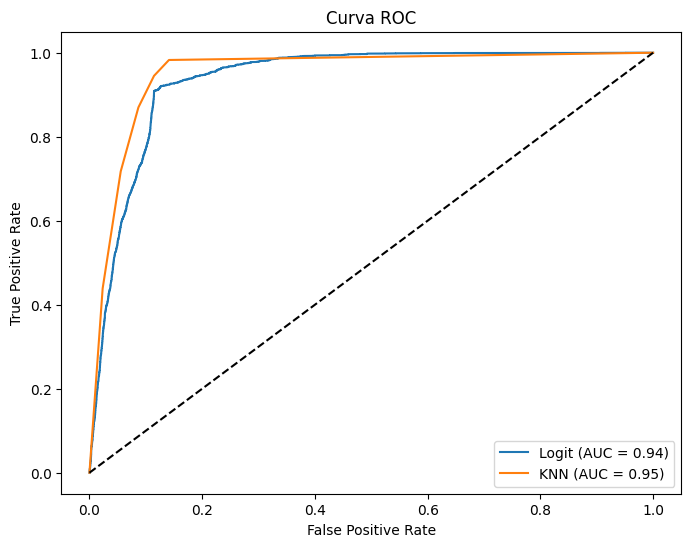

In [61]:
fpr_logit, tpr_logit, _ = roc_curve(y_test, y_prob_logit)
auc_logit = auc(fpr_logit, tpr_logit)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8,6))
plt.plot(fpr_logit, tpr_logit, label=f"Logit (AUC = {auc_logit:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [62]:
accuracy_logit = accuracy_score(y_test, y_pred_logit)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy - Regresión Logística: {accuracy_logit:.2f}")
print(f"Accuracy - KNN: {accuracy_knn:.2f}")

Accuracy - Regresión Logística: 0.86
Accuracy - KNN: 0.90


In [4]:
import pandas as pd

# Cargar el archivo
df_norespondieron = pd.read_excel(r"C:\Users\El economista\Documents\GitHub\-BigDataUBA-Grupo-25\TPs\TP4\df_completo_original.xlsx")

In [33]:
import pandas as pd
# Crear la nueva columna "edad²" con los valores al cuadrado
# Renombrar la columna "edad" a "edad2"
df_norespondieron.rename(columns={"ch06": "edad2"}, inplace=True)
df_norespondieron["edad²"] = df_norespondieron["edad2"] ** 2
df_norespondieron["pp3e_tot"] = df_norespondieron["pp3e_tot"].fillna(0)
df_norespondieron["pp3f_tot"] = df_norespondieron["pp3f_tot"].fillna(0)
df_norespondieron["horastrab"] = df_norespondieron["pp3e_tot"] + df_norespondieron["pp3f_tot"]
# Aplicar el coeficiente de ajuste
df_norespondieron["p21"] = df_norespondieron["p21"].astype(float)  # Convertir a float antes de modificar
df_norespondieron.loc[df_norespondieron["ano4"] == 2004, "p21"] *= 314.621568
# Calcular el salario semanal
df_norespondieron["salario_semanal"] = df_norespondieron["p21"] / 40
# Función para calcular años de educación
def calcular_educ(row):
    if row["ch12"] == 2:  # Primario
        return row["ch14"]
    elif row["ch12"] == 4:  # Secundario
        return 12 if row["ch13"] == 1 else row["ch14"]
    elif row["ch12"] == 6:  # Terciario
        return 15 if row["ch13"] == 1 else 12 + row["ch14"]
    elif row["ch12"] == 7:  # Universitario
        return 17 if row["ch13"] == 1 else 12 + row["ch14"]
    elif row["ch12"] == 9:  # Educación especial
        return None  # No comparable
    else:
        return None  # Ns/Nr u otro valor

# Aplicar la función al DataFrame
df_norespondieron["educ"] = df_norespondieron.apply(calcular_educ, axis=1)
# Crear variable mujer
df_norespondieron["mujer"] = (df_norespondieron["ch04"] == 2).astype(int) 
df_train = df_norespondieron[df_norespondieron["estado"].isin([1, 2])].copy()  # Filtrar solo ocupados y desocupados
df_norespondieron["norespondieron"] = (df_norespondieron["estado"] == 0).astype(int) 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Si en el entrenamiento ya tenés X_train definido, usá ese conjunto; 
# de lo contrario, ajustamos con X_norespondieron o alguna otra partición.
scaler.fit(X_norespondieron)

StandardScaler()

In [35]:
import numpy as np
X_norespondieron = df_norespondieron[columnas_features].copy()
X_norespondieron = X_norespondieron.copy()  # Asegura que trabajamos sobre una copia real del DataFrame
X_norespondieron["educ"] = X_norespondieron["educ"].fillna(0)  # Reemplaza NaN por 0
X_norespondieron_scaled = scaler.transform(X_norespondieron)


In [43]:
import pandas as pd
# 1. Definir las columnas features (sin incluir la variable objetivo 'desocupado')
columnas_features = ["edad2", "educ", "mujer", "horastrab", "norespondieron"]

X_train = df_train[columnas_features]
X_train.loc[:, "educ"] = X_train["educ"].fillna(0)
X_norespondieron.loc[:, "educ"] = X_norespondieron["educ"].fillna(0)
y_train = df_train["estado"].map({1: 0, 2: 1})  # Ocupado → 0, Desocupado → 1

In [44]:
from sklearn.linear_model import LogisticRegression
modelo_seleccionado = LogisticRegression(solver="lbfgs", max_iter=5000)
modelo_seleccionado.fit(X_train, y_train)  # Asegúrate de que X_train y y_train están correctamente definidos
from sklearn.linear_model import LogisticRegression
X_norespondieron_scaled_df = pd.DataFrame(X_norespondieron_scaled, columns=X_train.columns)

In [45]:
y_pred_norespondieron = modelo_seleccionado.predict(X_norespondieron_scaled_df)
print("Predicciones:", y_pred_norespondieron)
proporcion_desocupados = y_pred_norespondieron.mean()
print(f"La proporción estimada de desocupados en 'norespondieron' es: {proporcion_desocupados:.2%}")

Predicciones: [1 1 1 ... 1 1 1]
La proporción estimada de desocupados en 'norespondieron' es: 93.47%
